## Предобработка данных

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#настроим опцию отображения чисел с плавающей запятой
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
#настроим опцию отображения длинных значений в колонках
pd.set_option('max_colwidth', 1000)

In [4]:
#откроем файлы с данными
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [5]:
#напишем функцию для вывода общих данных
def general_info(df):
    print(df.info())
    display(df.describe())
    if len(df) <= 10:
        display(df)
    else:
        display(df.head())

In [6]:
#изучим общую информацию датасета hypothesis
general_info(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [7]:
#изучим общую информацию датасета orders
general_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
#изучим общую информацию датасета visitors
general_info(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Открыв и изучив общую информацию датасетов, я не заметил больших проблем в данных: на первый взгляд пропусков и ошибок нет, необходимо лишь привести названия столбцов датасетов к общепринятому виду и откорректировать типы данных в столбцах с датами.

In [9]:
#заменим названия столбцов
hypothesis.columns =  [col.lower() for col in hypothesis.columns]
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
#проверка
for dataset in [hypothesis, orders]:
    print(dataset.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


In [10]:
#заменим типы данных в датасетах на корректные
for dataset in [orders, visitors]:
    dataset['date'] = pd.to_datetime(dataset['date'], format='%Y.%m.%d')
#проверка   
    display(dataset.dtypes)

transaction_id             int64
visitor_id                 int64
date              datetime64[ns]
revenue                    int64
group                     object
dtype: object

date        datetime64[ns]
group               object
visitors             int64
dtype: object

In [11]:
#проверим датасеты на наличие пропусков в них
for dataset in [hypothesis, orders, visitors]:
#проверка
    display(dataset.isna().sum())

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [12]:
#проверим датасеты на наличие дубликатов в них
print(f'Кол-во дубликатов в датасете hypothesis: {hypothesis.duplicated().sum()}')
print(f'Кол-во дубликатов в датасете orders: {orders.duplicated().sum()}')
print(f'Кол-во дубликатов в датасете visitors: {visitors.duplicated().sum()}')

Кол-во дубликатов в датасете hypothesis: 0
Кол-во дубликатов в датасете orders: 0
Кол-во дубликатов в датасете visitors: 0


### Вывод по этапу предобработки

На этапе предобработки мной были исправлены основные ошибки в данных: столбцы переименованы и приведены к общепринятому виду, а данные в столбцах, содержащих информацию о датах, преобразованы в формат `datetime` для удобства нальнейшей работы с ними.

Дополнительная проверка на наличие пропусков и дубликатов ничего не выявила. Данные готовы к анализу.

## Часть 1. Приоритизация гипотез

In [13]:
#рассчитаем ICE score
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis.sort_values(by='ice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [14]:
#рассчитаем RICE score
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis.sort_values(by='rice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


### Выводы по приоритизации гипотез

Составив рейтинг гипотез согласно фреймворку ICE, я пришел к выводу, что наиболее перспективными являются следующие гипотезы:
- 8 - Запустить акцию, дающую скидку на товар в день рождения;
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Однако, после приоритизации этих же гипотез согласно фреймворку RICE распределение мест в тройке лидеров изменилось и теперь выглядит следующим образом:
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

Смена мест в рейтинге гипотез произошла из-за того, что фреймворк RICE учитывает также и охват аудитории - количество пользователей, которых затронет изменение: чем больше параметр `reach`, тем выше может стать приоритет конкретной гипотезы. Именно поэтому гипотеза 2 подялась на второе место (ее охват равен 8), а гипотеза 8 - лидер по ICE score - опустилась на пятое место (ее параметр `reach` равен 1).

Таким образом, мы видим, что по результатам оценки гипотез при помощи обоих фреймворков выявились две перпективных гипотезы - 7 и 0, попавшие в обоих случаях в топ-3.

## Анализ A/B-теста

#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [15]:
#создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [16]:
#получим агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= 
x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 
'transaction_id': pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), 
axis=1).sort_values(by=['date','group'])
#получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] 
<= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
#объединим кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], 
right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
#проверка
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Величина кумулятивной выручки')

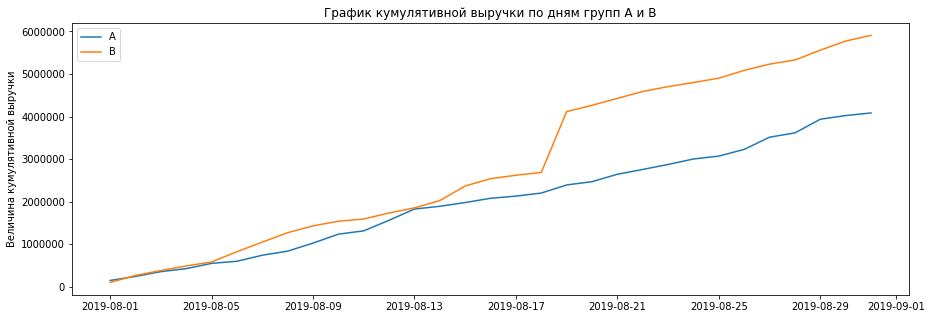

In [17]:
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
#построим график выручки группы А
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
#построим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('График кумулятивной выручки по дням групп А и В')
plt.ylabel('Величина кумулятивной выручки')

Вглянув на график кумулятивной выручки, я могу сказать, что на протяжении всего теста выручка обеих групп планомерно растет. Уже после пятого дня заметно превосходство по данному параметру группы В, которое лишь усилилось после существенного скачка 19-го августа. В природе происхождения данного скачка предстоит разобраться, однако сейчас можно предположить, что он вызван очень дорогим заказом.

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Text(0, 0.5, 'Величина кумулятивного среднего чека')

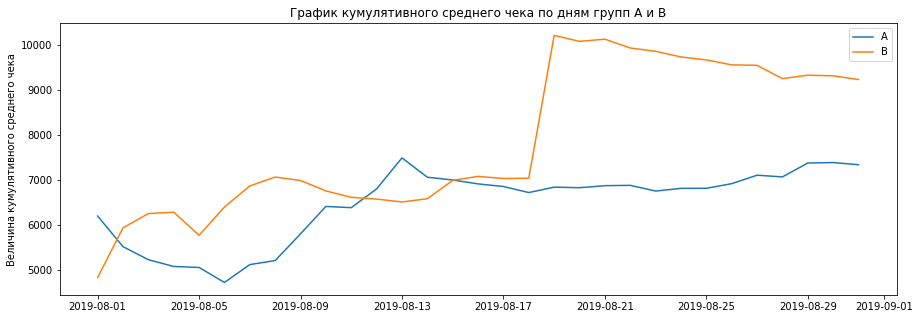

In [18]:
#построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по дням групп А и В')
plt.ylabel('Величина кумулятивного среднего чека')

Проанализировав график кумулятивного среднего чека, я могу сказать, что в первой половине теста показатель очень сильно варьировался у обеих групп, графики неоднократно пересекались. Во второй половине графики стабилизировались, однако нельзя не обратить внимание на резкий скачок показателя в группе В, произошедший 19-го августа и вызванный, скорее всего, очень доргим заказом.

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Text(0.5, 1.0, 'График относительного различия для среднего чека групп А и В')

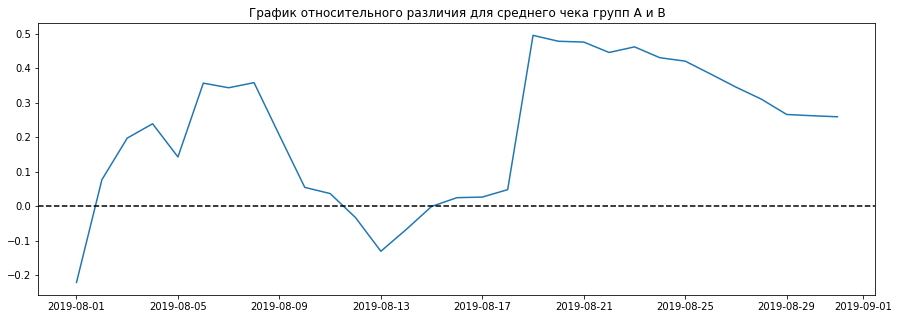

In [19]:
#соберем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA\
        .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#поcтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'],\
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
#добавим ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного различия для среднего чека групп А и В')

График относительного различия для среднего чека групп А и В говорит о том, что в первый день теста средний чек был выше в группе А, но уже на второй день группа В вырвалась вперед и сохраняла свое лидерство практически на весь срок проведения теста. На графике я увидел довольно много резких изменений - признаков отдельных дорогих заказов в обеих группах.

#### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

Text(0, 0.5, 'Величина кумулятивной конверсии')

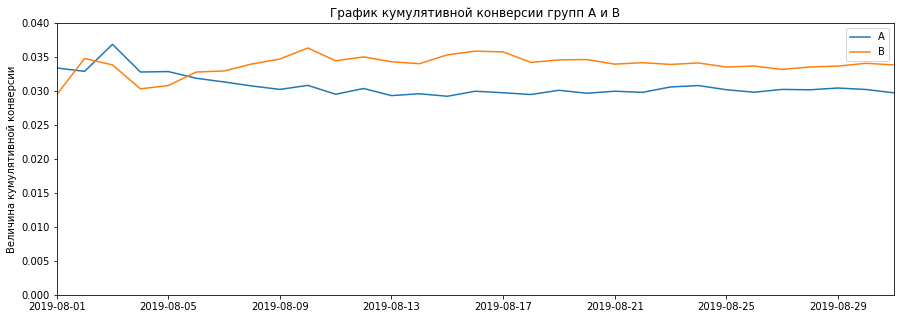

In [20]:
#рассчитаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
#отделим данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
#отделим данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
#построим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis(["2019-08-01", '2019-08-31', 0, 0.04])
plt.title('График кумулятивной конверсии групп А и В')
plt.ylabel('Величина кумулятивной конверсии')

Графики кумулятивной конверсии групп А и В сильно колебались в первые 5 дней теста, а в течение следующих пяти дней вышли на свои итоговые показатели, зафиксировав лидерство группы В. Такая картина обусловлена тем, что в начале теста - на малых числах - изменения более заметны, а со временем кумулятивный показатель приходит к своему реальному значению.

#### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

Text(0.5, 1.0, 'Относительный прирост конверсии группы B относительно группы A')

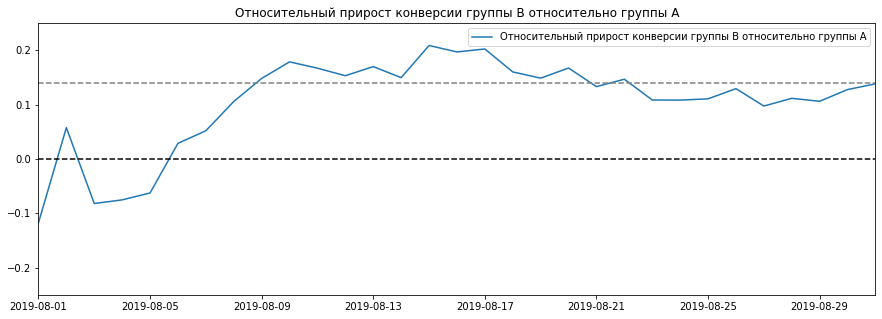

In [21]:
#рассчитаем относительное изменение конверсии
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
        .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#построим графики
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.25, 0.25])
plt.title('Относительный прирост конверсии группы B относительно группы A')

На графике относительного прироста конверсии группы В относительно группы А можно увидеть, что уже на 10-й день теста показатели достигли своих реальных значений.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Text(0, 0.5, 'Количество заказов одного пользователя, шт.')

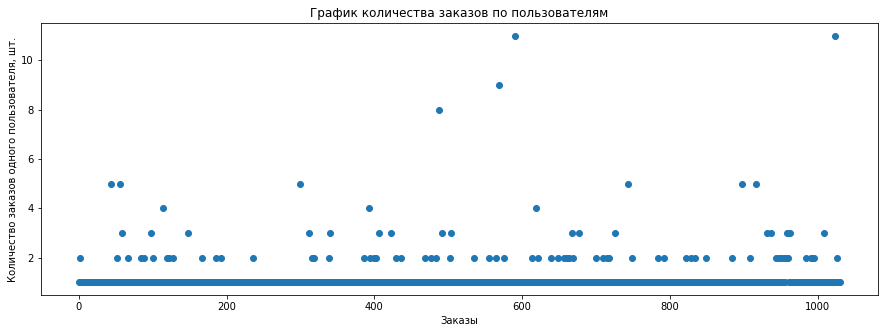

In [22]:
#построим точечный график количества заказов по пользователям
orders_grouped = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'count'})
orders_grouped = orders_grouped.rename(columns={'transaction_id':'n_transactions'})
x_values = pd.Series(range(0,len(orders_grouped['n_transactions'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders_grouped['n_transactions'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Заказы')
plt.ylabel('Количество заказов одного пользователя, шт.')

Изучив график количества заказов по пользователям, я могу сказать, что за время проведения теста подавляющее большинство покупателей сделало лишь один заказ. Единицы сделали более двух заказов. Отдельно можно заметить, что несколько покупателей сделали 8 и более заказов.

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [23]:
#рассчитаем 95-й и 99-й перцентили количества заказов на пользователя
print(f"95-й перцентиль количества заказов на пользователя равен {np.percentile(orders_grouped['n_transactions'], 95)}")
print(f"99-й перцентиль количества заказов на пользователя равен {np.percentile(orders_grouped['n_transactions'], 99)}")

95-й перцентиль количества заказов на пользователя равен 2.0
99-й перцентиль количества заказов на пользователя равен 4.0


Рассчитав 95-й и 99-й процентили количества заказов одного пользователя, я получил следующий результат: только 5% клиентов сделали более двух заказов, а доля тех, кто сделал более четырех - 1%.

На основании данных результатов я принял решение признать аномальными пользователями тех, кто совершил более двух заказов - 5% от общего числа.

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Text(0, 0.5, 'Стоимость заказа')

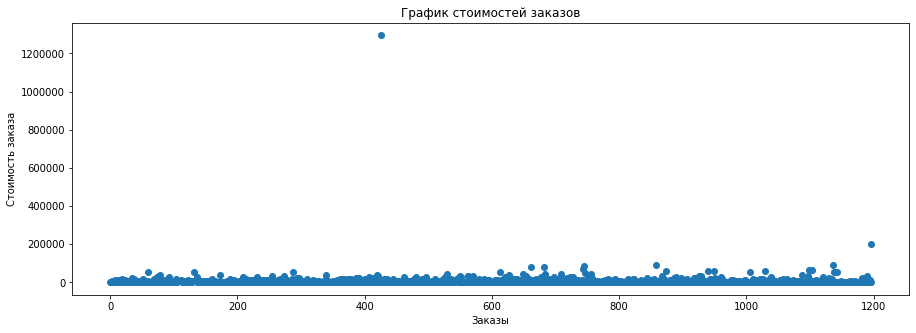

In [24]:
#построим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')

Проанализировав точечный график стоимостей заказов, я могу сказать, что в ходе эксперимента был зафиксирован аномально дорогой заказ  - более миллиона двухсот тысяч - вероятно, это и есть тот самый заказ, выведший группу В в лидеры. Этот заказ занчительно превысил все остальные заказы, из-за чего график выглядит неинформативно. Поэтому для точного определения границы аномальных пользователей по стоимости заказа неободимо будет рассчитать перцентили.

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [25]:
#рассчитаем 95-й и 99-й перцентили стоимости заказов
print(f"95-й перцентиль стоимости заказов равен {np.percentile(orders['revenue'], 95)}")
print(f"99-й перцентиль стоимости заказов равен {np.percentile(orders['revenue'], 99)}")

95-й перцентиль стоимости заказов равен 28000.000000000004
99-й перцентиль стоимости заказов равен 58233.19999999999


Рассчитав 95-й и 99-й процентили стоимости заказов, я получил следующий результат: только 5% клиентов сделали заказ дороже двадцати восьми тысяч, а доля тех, кто сделал заказ дороже, чем 58233,2 - 1%.

На основании данных результатов я принял решение признать аномальными покупателями тех, кто совершил заказ от тридцати тысяч - от 1 до 5% от общего числа.

#### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [26]:
#подготовим данные
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [27]:
#установим пороговое значение статистического уровня значимости
alpha = 0.05
#рассчитаем статистическую значимость различий в конверсии между группами А и В
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()\
                - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()\
                - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
if stats.mannwhitneyu(sampleA, sampleB)[1] < alpha:
    print('Нулевая гипотеза неверна')
else:
    print('Нельзя отвергнуть нулевую гипотезу')
print("Отношение конверсии группы В к А: {0:.1%}".format(sampleB.mean()/sampleA.mean()-1))

p-value = 0.008
Нулевая гипотеза неверна
Отношение конверсии группы В к А: 13.8%


Для оценки статистической значимости различий в конверсии между группами А и В по "сырым" данным я использовал U-критерий Манна-Уитни, выдвинув нулевую гипотезу о равенстве конверсий обеих групп. Порогое значения уровня значимости было выбрано мной на уровне 5%. В итоге уровень значимости оказался значительно меньше 5%, исходя из чего я пришел к выводу, что нулевая гипотеза неверна, а значит, конверсии в обеих группах не равны.

Относительный выигрыш группы В в конверсии оказался равным 13,8%.

Расчет подтвердил мои выводы из графика конверсий: лидерство группы В очевидно.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [28]:
#рассчитаем статистическую значимость различий в среднем чеке между группами А и В
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']\
        ['revenue'])[1]))
if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < alpha:
    print('Нулевая гипотеза неверна')
else:
    print('Нельзя отвергнуть нулевую гипотезу')
print("Отношение среднего чека группы В к А: {0:.1%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.365
Нельзя отвергнуть нулевую гипотезу
Отношение среднего чека группы В к А: 25.9%


Для оценки статистической значимости различий в среднем чеке между группами А и В по "сырым" данным я также использовал U-критерий Манна-Уитни, выдвинув нулевую гипотезу о равенстве средних чеков в обеих группах. Порогое значения уровня значимости по прежнему было выбрано мной на уровне 5%. В итоге уровень значимости оказался значительно выше 5%, исходя из чего я пришел к выводу, что отвергнуть нулевую гипотезу нельзя, а значит, можно говорить о том, что величины средних чеков в группах равны.

При этом, относительный выигрыш группы В в величине среднего чека оказался равным 25,9%.

Результат оценки гипотезы противоречит, во-первых, графику среднего чека групп А и В: согласно графику чек группы В выше и превосходил чек группы А на протяжении практически всего теста. Вероятно, это связано с выбросами и, в первую очередь, тем очень дорогим заказом. А во-вторых, результат оценки противоречит расчету отношения среднего чека группы В к А: как две величины могут быть одновременно равны и отичаться на 26%? Для ответа на этот вопрос необходимо "очистить" данные от выбросов и провести повторную оценку.

#### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [29]:
#определим аномальных пользователей
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]\
        ['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64

(68,)


In [30]:
#рассчитаем статистическую значимость различий в конверсии между группами А и В
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],\
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],\
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha:
    print('Нулевая гипотеза неверна')
else:
    print('Нельзя отвергнуть нулевую гипотезу')
print("Отношение конверсии группы В к А: {0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.007
Нулевая гипотеза неверна
Отношение конверсии группы В к А: 17.2%


Для оценки статистической значимости различий в конверсии между группами А и В по "очищенным" данным я также использовал U-критерий Манна-Уитни, выдвинув нулевую гипотезу о равенстве конверсий обеих групп. Порогое значения уровня значимости по прежнему было выбрано мной на уровне 5%. В итоге уровень значимости оказался еще ниже, чем в случае "сырых" данных - все так же меньше 5%, исходя из чего я пришел к выводу, что нулевая гипотеза неверна, а значит, конверсии обеих групп отличаются.

Относительный выигрыш группы В в конверсии оказался выше на 3,5% исоставил 17,2%.

Оценка гипотезы в очередной раз подтвердила выводы, следовавшие из графика конверсии, о том, что конверсия группы В существенно выше конверсии группы А.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [31]:
#рассчитаем статистическую значимость различий в среднем чеке между группами А и В
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',\
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(orders['group']=='B',\
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))
if stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',\
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(orders['group']=='B',\
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1] < alpha:
    print('Нулевая гипотеза неверна')
else:
    print('Нельзя отвергнуть нулевую гипотезу')
print("Отношение среднего чека группы В к А: {0:.1%}".format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id']\
    .isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitor_id']\
    .isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value = 0.360
Нельзя отвергнуть нулевую гипотезу
Отношение среднего чека группы В к А: -2.3%


Для оценки статистической значимости различий в среднем чеке между группами А и В по "очищенным" данным я также использовал U-критерий Манна-Уитни, выдвинув нулевую гипотезу о равенстве средних чеков в обеих группах. Порогое значения уровня значимости по прежнему было выбрано мной на уровне 5%. В итоге уровень значимости вновь оказался значительно выше 5%, исходя из чего я пришел к выводу, что и в этом случае отвергнуть нулевую гипотезу нельзя, а значит, можно говорить о том, что величины средних чеков в группах равны.

Если при оценке гипотезы по "сырым" данным группа В лидировала, то теперь, после "очистки", она отстает от группы А на 2,3%.

В результате "очистки" данных от выбросов я пришел к выводу, что средний чек группы В не только не выше среднего чека группы А, но даже ниже. Правильной первоначальной оценке данных мешали аномальные заказы и, в первую очередь, заказ на сумму более миллиона двухсот тысяч.

Этот результат противоречит изначальной оценке графика среднего чека групп А и В, но теперь, благодаря правильной оценке гипотез, можно принимать решение о дальнейшей судьбе А/В-теста.

На основании оценок гипотез и отношений расчетных величин я принял решение о прекращении А/В-теста, зафиксировав победу группы В: она конвертирует на 17% лучше, что является существенным результатом. При этом, значимой разницы в средних чеках групп А и В нет.

## Итоговый вывод по проекту

В проекте, посвященном аналитике крупного интернет-магазина, мы подготовили список гипотез для увеличения выручки, приоритизировали их, запустили A/B-тест и проанализировали результаты.

Составив рейтинг гипотез согласно фреймворку ICE, я пришел к выводу, что наиболее перспективными являются следующие гипотезы 8, 0 и 7. Однако, после приоритизации этих же гипотез согласно фреймворку RICE распределение мест в тройке лидеров изменилось на 7, 2 и 0. Смена мест в рейтинге гипотез произошла из-за того, что фреймворк RICE учитывает также и охват аудитории - количество пользователей, которых затронет изменение: чем больше параметр reach, тем выше может стать приоритет конкретной гипотезы. Таким образом, мы видим, что по результатам оценки гипотез при помощи обоих фреймворков выявились две перпективных гипотезы - 7 и 0, попавшие в обоих случаях в топ-3.

Вглянув на график кумулятивной выручки, я могу сказать, что на протяжении всего теста выручка обеих групп планомерно растет. Уже после пятого дня заметно превосходство по данному параметру группы В, которое лишь усилилось после существенного скачка 19-го августа. В природе происхождения данного скачка предстоит разобраться, однако сейчас можно предположить, что он вызван очень дорогим заказом.

Проанализировав график кумулятивного среднего чека, я могу сказать, что в первой половине теста показатель очень сильно варьировался у обеих групп, графики неоднократно пересекались. Во второй половине графики стабилизировались, однако нельзя не обратить внимание на резкий скачок показателя в группе В, произошедший 19-го августа и вызванный, скорее всего, очень доргим заказом.

График относительного различия для среднего чека групп А и В говорит о том, что в первый день теста средний чек был выше в группе А, но уже на второй день группа В вырвалась вперед и сохраняла свое лидерство практически на весь срок проведения теста. На графике я увидел довольно много резких изменений - признаков отдельных дорогих заказов в обеих группах.

Графики кумулятивной конверсии групп А и В сильно колебались в первые 5 дней теста, а в течение следующих пяти дней вышли на свои итоговые показатели, зафиксировав лидерство группы В. Такая картина обусловлена тем, что в начале теста - на малых числах - изменения более заметны, а со временем кумулятивный показатель приходит к своему реальному значению.

На графике относительного прироста конверсии группы В относительно группы А можно увидеть, что уже на 10-й день теста показатели достигли своих реальных значений.

Изучив график количества заказов по пользователям, я могу сказать, что за время проведения теста подавляющее большинство покупателей сделало лишь один заказ. Единицы сделали более двух заказов. Отдельно можно заметить, что несколько покупателей сделали 8 и более заказов.

Рассчитав 95-й и 99-й процентили количества заказов одного пользователя, я получил следующий результат: только 5% клиентов сделали более двух заказов, а доля тех, кто сделал более четырех - 1%. На основании данных результатов я принял решение признать аномальными пользователями тех, кто совершил более двух заказов - 5% от общего числа.

Проанализировав точечный график стоимостей заказов, я могу сказать, что в ходе эксперимента был зафиксирован аномально дорогой заказ - более миллиона двухсот тысяч - вероятно, это и есть тот самый заказ, выведший группу В в лидеры. Этот заказ занчительно превысил все остальные заказы, из-за чего график выглядит неинформативно. Поэтому для точного определения границы аномальных пользователей по стоимости заказа неободимо будет рассчитать перцентили.

Рассчитав 95-й и 99-й процентили стоимости заказов, я получил следующий результат: только 5% клиентов сделали заказ дороже двадцати восьми тысяч, а доля тех, кто сделал заказ дороже, чем 58233,2 - 1%. На основании данных результатов я принял решение признать аномальными покупателями тех, кто совершил заказ от тридцати тысяч - от 1 до 5% от общего числа.

Для оценки статистической значимости различий в конверсии между группами А и В по "сырым" данным я использовал U-критерий Манна-Уитни, выдвинув нулевую гипотезу о равенстве конверсий обеих групп. Порогое значения уровня значимости было выбрано мной на уровне 5%. В итоге уровень значимости оказался значительно меньше 5%, исходя из чего я пришел к выводу, что нулевая гипотеза неверна, а значит, конверсии в обеих группах не равны.
Относительный выигрыш группы В в конверсии оказался равным 13,8%.
Расчет подтвердил мои выводы из графика конверсий: лидерство группы В очевидно.

Для оценки статистической значимости различий в среднем чеке между группами А и В по "сырым" данным я также использовал U-критерий Манна-Уитни, выдвинув нулевую гипотезу о равенстве средних чеков в обеих группах. Порогое значения уровня значимости по прежнему было выбрано мной на уровне 5%. В итоге уровень значимости оказался значительно выше 5%, исходя из чего я пришел к выводу, что отвергнуть нулевую гипотезу нельзя, а значит, можно говорить о том, что величины средних чеков в группах равны.
При этом, относительный выигрыш группы В в величине среднего чека оказался равным 25,9%.
Результат оценки гипотезы противоречит, во-первых, графику среднего чека групп А и В: согласно графику чек группы В выше и превосходил чек группы А на протяжении практически всего теста. Вероятно, это связано с выбросами и, в первую очередь, тем очень дорогим заказом. А во-вторых, результат оценки противоречит расчету отношения среднего чека группы В к А: как две величины могут быть одновременно равны и отичаться на 26%? Для ответа на этот вопрос необходимо "очистить" данные от выбросов и провести повторную оценку.

Для оценки статистической значимости различий в конверсии между группами А и В по "очищенным" данным я также использовал U-критерий Манна-Уитни, выдвинув нулевую гипотезу о равенстве конверсий обеих групп. Порогое значения уровня значимости по прежнему было выбрано мной на уровне 5%. В итоге уровень значимости оказался еще ниже, чем в случае "сырых" данных - все так же меньше 5%, исходя из чего я пришел к выводу, что нулевая гипотеза неверна, а значит, конверсии обеих групп отличаются.
Относительный выигрыш группы В в конверсии оказался выше на 3,5% исоставил 17,2%.
Оценка гипотезы в очередной раз подтвердила выводы, следовавшие из графика конверсии, о том, что конверсия группы В существенно выше конверсии группы А.

Для оценки статистической значимости различий в среднем чеке между группами А и В по "очищенным" данным я также использовал U-критерий Манна-Уитни, выдвинув нулевую гипотезу о равенстве средних чеков в обеих группах. Порогое значения уровня значимости по прежнему было выбрано мной на уровне 5%. В итоге уровень значимости вновь оказался значительно выше 5%, исходя из чего я пришел к выводу, что и в этом случае отвергнуть нулевую гипотезу нельзя, а значит, можно говорить о том, что величины средних чеков в группах равны.
Если при оценке гипотезы по "сырым" данным группа В лидировала, то теперь, после "очистки", она отстает от группы А на 2,3%.
В результате "очистки" данных от выбросов я пришел к выводу, что средний чек группы В не только не выше среднего чека группы А, но даже ниже. Правильной первоначальной оценке данных мешали аномальные заказы и, в первую очередь, заказ на сумму более миллиона двухсот тысяч.
Этот результат противоречит изначальной оценке графика среднего чека групп А и В, но теперь, благодаря правильной оценке гипотез, можно принимать решение о дальнейшей судьбе А/В-теста.

На основании оценок гипотез и отношений расчетных величин я принял решение о прекращении А/В-теста, зафиксировав победу группы В: она конвертирует на 17% лучше, что является существенным результатом. При этом, значимой разницы в средних чеках групп А и В нет.